We're going to be using dataset called the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/) that contains 7,349 images of cats and dogs from 37 different breeds. We've already downloaded them for you, all we need to do is copy it to our folder.

In [ ]:
!mkdir -p pets && cp -r ../../pets .

In [1]:
from fastai.vision.all import *

In [ ]:
path = 'pets'

In [ ]:
def is_cat(x): 
    return x[0].isupper()

It looks at the name of a picture, and if the very first letter in the name is a big letter, like 'C' for Cat, the robot says, "Hey, this is a picture of a cat!" If the first letter is a small letter, like 'd' for dog, the robot says, "Nope, not a cat."

In [ ]:
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), 
    valid_pct=0.2,
    label_func=is_cat, 
    item_tfms=Resize(224)
)

path: This is like telling the computer where all the pictures are kept, just like saying, "Look in this special box of photos."

get_image_files(path): This part helps the computer find all the pictures in that special box. It's like telling a friend to pick out all the photos from that box.

valid_pct=0.2: This is like saying, "Let's take some photos out to check if our computer is really good at guessing." We take out 20% of the photos for testing.

label_func=label_func: We're teaching the computer how to recognize what's in each photo. We say, "If the name of the photo starts with a big letter, it's a picture of a cat. If it starts with a small letter, it's not a cat."

item_tfms=Resize(460): Imagine we have a magic tool that can make all the photos the same size. This tool helps the computer understand the pictures better. We tell it to resize the photos to be 460 pixels big.

batch_tfms=aug_transforms(size=224, min_scale=0.75): This is like adding some special effects to the photos to make them look different from each other. It's like putting funny hats on some photos and sunglasses on others so the computer learns better.

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

Create a learner: This is like getting a special teacher for the computer. We tell the computer, "Hey, we have a smart teacher called 'learn' who knows a lot about pictures."

using a pre-trained model: Think of it like the teacher already knows a bit about recognizing things in pictures. It's like having a friend who's really good at guessing what's in photos.

resnet34: We tell the teacher to use a special book called 'resnet34' that helps the computer understand pictures better.

metrics=error_rate: This is like a scorecard. We want to see how good the computer is at guessing. The lower the score, the better it is.

Training the model: Now, it's time for the computer to learn. It's like the teacher is showing the computer lots of pictures and saying, "This is a cat" or "This is not a cat." The computer learns from the teacher.

So, in this part, we get a teacher for the computer, use a smart book, and let the computer learn by looking at lots of pictures. It's like teaching the computer to be really good at telling cats from other things.

In [ ]:
learn.fine_tune(1)

Fine-tuning is like making small adjustments to our detective's brain. You know how sometimes you learn something new, like riding a bike? At first, you wobble a bit, but then you get better and better. Fine-tuning is like helping our detective get better at recognizing cats by making those small adjustments to their special tool.

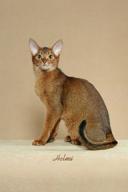

In [2]:
img = PILImage.create('pets/Abyssinian_11.jpg')
img.to_thumb(192)

So, how do we know if this model is any good? In the last column of the table you can see the error rate, which is the proportion of images that were incorrectly identified. The error rate serves as our metric—our measure of model quality, chosen to be intuitive and comprehensible. As you can see, the model is nearly perfect, even though the training time was only a few seconds. In fact, the accuracy you've achieved already is far better than anybody had ever achieved just 10 years ago!

Finally, let's check that this model actually works.

Now you can pass the uploaded file to the model. Make sure that it is a clear photo of a single dog or a cat, and not a line drawing, cartoon, or similar. The notebook will tell you whether it thinks it is a dog or a cat, and how confident it is. Hopefully, you'll find that your model did a great job:

In [ ]:
is_cat,_,probs = learn.predict(img)

print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Congratulations on your first classifier!